In [43]:
import pandas as pd
import numpy as np

In [44]:
wine_data = pd.read_csv('winequality-white.csv', names=[
    "Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
    "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density",
    "pH", "Sulphates", "Alcohol", "Quality"],
                       skiprows = 1,
                       sep=r'\s*;\s*', engine= 'python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


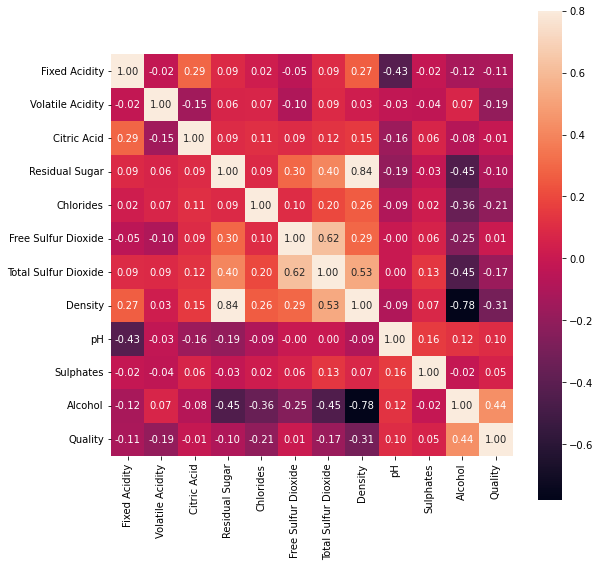

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr() #computes pairwise correlation
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax= 0.8, square=True, annot=True, fmt= '.2f')
plt.show()

In [46]:
X = wine_data.drop('Quality', axis=1) # X have all the columns except Quality
y = wine_data['Quality'] # y have just the quality

In [69]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 5, max_features=4, criterion='entropy')


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [71]:
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4)

In [72]:
score = classifier.score(X_test, y_test)
print(score)

0.49795918367346936


In [73]:
classifier.n_features_

11

In [74]:
classifier.feature_importances_

array([0.        , 0.17080441, 0.01976008, 0.07497058, 0.01307753,
       0.12910829, 0.00959917, 0.3218498 , 0.02583961, 0.01873522,
       0.21625532])

In [75]:
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file='tree.dot', feature_names=X.columns)

In [76]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0